# IBM HR Analytics Employee Attrition Modeling

**1. Import the required libraries from Python**

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

**2. Load the IBM Attrition Data** 

In [35]:
IBM_attrition_data = pd.read_csv("IBM Attrition Data.csv")

In [36]:
IBM_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


**3. Look up the columns of the data and see if there are any null values**

In [37]:
IBM_attrition_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [38]:
IBM_attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


**4. Find the age distribution of employees in IBM**

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

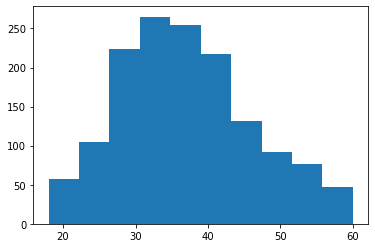

In [39]:
plt.hist(IBM_attrition_data.Age)

In [40]:
IBM_attrition_data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

**5. Explore attrition by age**

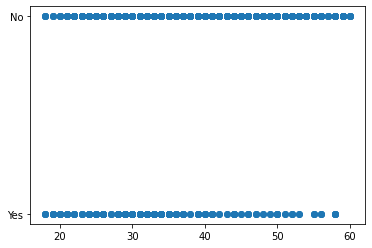

In [41]:
plt.scatter(IBM_attrition_data.Age,IBM_attrition_data.Attrition)

**6. Explore data for Left employees**

In [42]:
IBM_left_employees = IBM_attrition_data[IBM_attrition_data['Attrition']=='Yes']

(array([22., 22., 47., 50., 31., 19., 12., 11., 12., 11.]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58.]),
 <BarContainer object of 10 artists>)

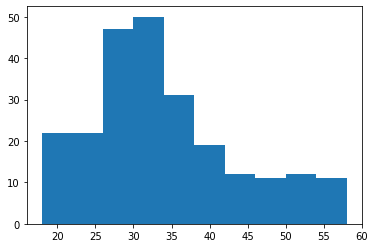

In [43]:
plt.hist(IBM_left_employees.Age)

**7. Find out the distribution of employees by the education field**

(array([606.,   0.,  82.,   0., 464.,   0., 159.,   0., 132.,  27.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

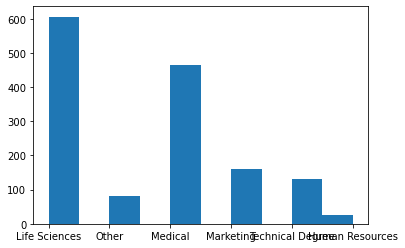

In [44]:
plt.hist(IBM_attrition_data.EducationField)

In [45]:
IBM_attrition_data.Attrition.replace(('Yes','No'),(1,0),inplace=True)

In [46]:
IBM_attrition_data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


**8. Construct bar chart for the number of married,unmarried and divorced employees**

In [47]:
IBM_attrition_data.MaritalStatus.replace(('Married','Single','Divorced'),(2,1,0),inplace=True)

C:\Users\jayva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

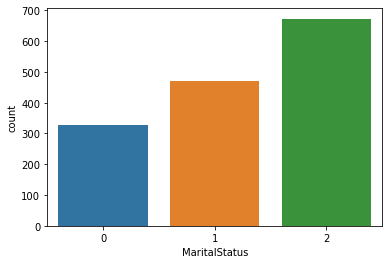

In [48]:
sns.countplot(IBM_attrition_data.MaritalStatus)

**9. Categorize all the data into numeric format**

In [49]:
IBM_attrition_data.MaritalStatus.unique()

array([1, 2, 0], dtype=int64)

In [50]:
IBM_attrition_data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [51]:
IBM_attrition_data.Department.replace(('Sales','Research & Development','Human Resources'),(1,2,3),inplace=True)

In [52]:
IBM_attrition_data.Department.unique()

array([1, 2, 3], dtype=int64)

In [53]:
IBM_attrition_data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [54]:
IBM_attrition_data.EducationField.replace(('Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'),(1,2,3,4,5,6),inplace=True)

In [55]:
IBM_attrition_data.EducationField.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [56]:
IBM_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,1,2,1,2,4,1,5993,8,1,6
1,49,0,2,8,1,1,3,2,2,5130,1,3,10
2,37,1,2,2,2,2,4,3,1,2090,6,3,0
3,33,0,2,3,4,1,4,3,2,2909,1,3,8
4,27,0,2,2,1,3,1,2,2,3468,9,3,2


In [57]:
IBM_attrition_data.keys()

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

**10. Use Logistic Regression model by assigning 'x' with all the independent variables except Attrition and assign 'y' with Attrition data**

In [58]:
x = IBM_attrition_data.drop('Attrition', axis=1)
y = IBM_attrition_data.Attrition

In [59]:
lm = LogisticRegression()

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [61]:
Model = lm.fit(x_train,y_train)

C:\Users\jayva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
print (Model.intercept_,Model.coef_)

[-0.00699334] [[-3.22791065e-02 -6.42072998e-02  1.77376896e-02 -6.31102485e-03
   8.57832313e-02 -1.44222837e-01 -1.24169903e-01 -6.47941498e-03
  -8.34096873e-05  1.61961763e-01 -4.28076853e-02  9.82261383e-03]]


In [63]:
prediction = Model.predict(x_test)

**11. Check the accuracy of the model**

In [64]:
lm.score(x_test,y_test)

0.8276643990929705

In [65]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
metrics.accuracy_score(y_test,prediction)

0.8276643990929705

**12. Calculate the probability of the accuracy of each outcome predicting the value of 'y'**

In [71]:
probs = Model.predict_proba(x_test)
probs

array([[0.84873922, 0.15126078],
       [0.74888486, 0.25111514],
       [0.82299969, 0.17700031],
       [0.70117533, 0.29882467],
       [0.81079779, 0.18920221],
       [0.53218819, 0.46781181],
       [0.94982378, 0.05017622],
       [0.9435589 , 0.0564411 ],
       [0.7999863 , 0.2000137 ],
       [0.8851703 , 0.1148297 ],
       [0.85055377, 0.14944623],
       [0.87403656, 0.12596344],
       [0.82583412, 0.17416588],
       [0.95182298, 0.04817702],
       [0.85171933, 0.14828067],
       [0.91408807, 0.08591193],
       [0.91021928, 0.08978072],
       [0.88762556, 0.11237444],
       [0.97994797, 0.02005203],
       [0.86110869, 0.13889131],
       [0.89914059, 0.10085941],
       [0.88323017, 0.11676983],
       [0.96145087, 0.03854913],
       [0.93889893, 0.06110107],
       [0.91233151, 0.08766849],
       [0.90442318, 0.09557682],
       [0.88295469, 0.11704531],
       [0.80823724, 0.19176276],
       [0.81056126, 0.18943874],
       [0.62283984, 0.37716016],
       [0.

**13. Calculate the values of ROC, AUC and Confusion Matrix**

In [73]:
metrics.roc_auc_score(y_test,probs[:,1])

0.7553713049747657

In [75]:
metrics.confusion_matrix(y_test,prediction)

array([[365,   0],
       [ 76,   0]], dtype=int64)

In [77]:
print (metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       365
           1       0.00      0.00      0.00        76

    accuracy                           0.83       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.69      0.83      0.75       441



C:\Users\jayva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print(x_train)

      Age  Department  DistanceFromHome  Education  EducationField  \
685    26           1                 1          3               3   
1448   41           1                 3          3               1   
1401   55           3                26          4               6   
1291   37           2                10          4               3   
217    29           2                 1          3               5   
...   ...         ...               ...        ...             ...   
1225   45           2                28          2               5   
658    44           2                 9          2               1   
578    38           2                 2          4               1   
391    40           2                 2          3               3   
1044   49           2                 5          4               5   

      EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome  \
685                         3                1              1           4294   

**14. Add random values to JJ according to the parameters mentioned above to check the probability of attrition of an employee**

In [85]:
JJ = [[35,2,4,6,3,2,3,2,1,3,2,9]]
print (Model.predict_proba(JJ))

[[0.76134481 0.23865519]]


C:\Users\jayva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
